In [1]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import seaborn as sns
import matplotlib.pyplot as plt

Reading Dataset

In [2]:
data = pd.read_csv('Dataset .csv')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
restaurant_map = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=10)
marker_cluster = MarkerCluster().add_to(restaurant_map)
for index, row in data.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(marker_cluster)

restaurant_map.save('restaurant_locations_map.html')

Ploting graph of 10 Distribution of Restaurants Across Cities

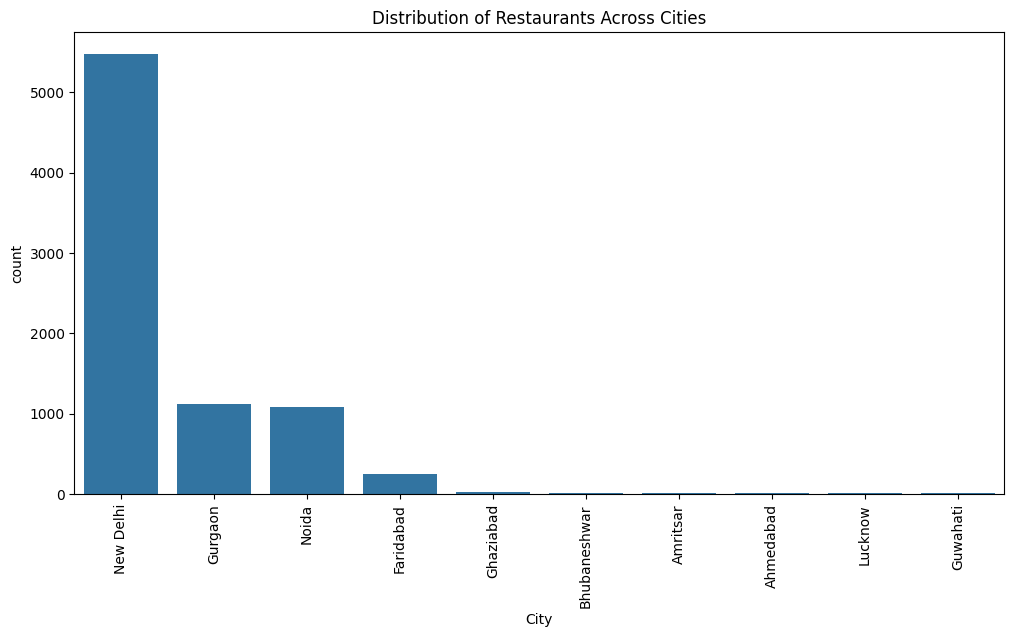

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='City', data=data, order=data['City'].value_counts().index[0:10])
plt.xticks(rotation=90)
plt.title('Distribution of Restaurants Across Cities')
plt.show()


Relation between Restaurant Location and Rating

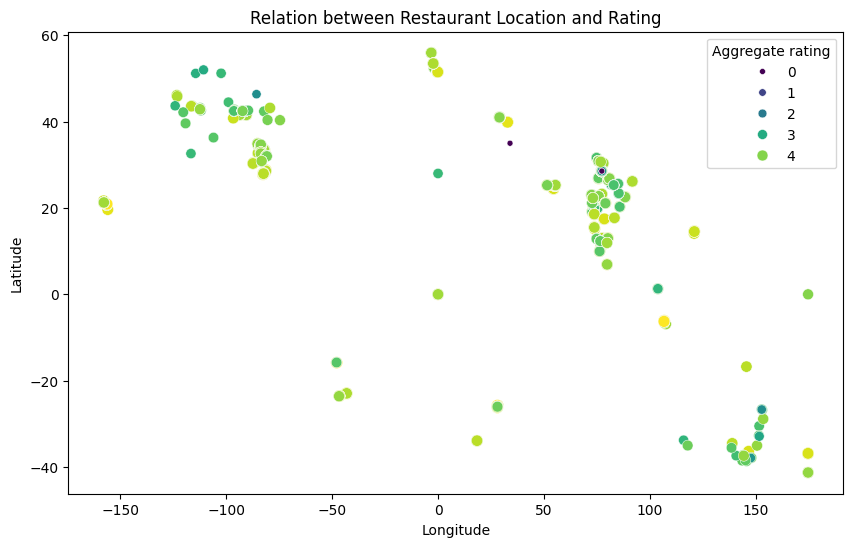

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Aggregate rating', data=data, palette='viridis', size='Aggregate rating')
plt.title('Relation between Restaurant Location and Rating')
plt.show()